# Neuronale Netze (Neural Nets)

Referenznotebook zum Thema "Neuronale Netze" (en. neural nets). Für die vollständige Erklärungen bitte auch das Video nutzen.

## Die Daten

Wir werden das bekannte [Boston Dataset](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) aus dem `MASS` Package verwenden. Es beschreibt Eigenschaften von Häusern in Boston im Jahr 1978. Es beinhaltet folgende Spalten:

* CRIM: Per Capita Kriminalitätsrate pro Stadt
* ZN: Anteil der Wohngebiete für Grundstücke mit mehr als 25.000 sq.ft.
* INDUS: Anteil an nicht-gewerblichen Acres pro Stadt
* CHAS: Charles River Dummy (1 falls der Fluss angrenzt, sonst 0)
* NOX: Stickoxid-Konzentration (Teile pro 10 Mil.)
* RM: Durchschnittliche Anzahl an Räumen pro Wohnung
* AGE: Anteil an Besitzer bewohnten Einheiten an Gebäuden die vor 1940 erbaut wurden
* DIS: Gewichtete Distanz uu 5 Arbeitsämtern in Boston
* RAD: Index des Zugangs zu Autobahnen
* TAX: Vollwertige Grundstückssteuerrate pro 10.000 Dollar
* PTRATIO: Schüler-Lehrer Rate nach Stadt
* B: 1000(Bk - 0.63)^2 wobei Bk der Anteil an Schwarzen ist
* LSTAT: % an niedrigem Status der Bevälkerung 
* MEDV: Median Wert von Besitzer bewohnten Häusern in $1000's

Wir werden versuchen den Median Wert MEDV vorherzusagen:

In [1]:
# install.packages("MASS")


The downloaded binary packages are in
	/var/folders/l_/ph09zg211515zffvzrp3bb680000gn/T//RtmpoiPfPI/downloaded_packages


In [2]:
library(MASS)

Warning message:
“package ‘MASS’ was built under R version 3.4.3”

In [3]:
set.seed(101)
data <- Boston

In [4]:
str(data)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [5]:
summary(data)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [6]:
head(data)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [7]:
any(is.na(data))

[1] FALSE

## Neuronales Netz Modell

Zuerst müssen wir die richtige Library installieren und aufrufen:

In [8]:
# install.packages("neuralnet")


The downloaded binary packages are in
	/var/folders/l_/ph09zg211515zffvzrp3bb680000gn/T//RtmpoiPfPI/downloaded_packages


In [9]:
library(neuralnet)

### Daten Normalisieren

Als ersten Schritt werden wir uns dem Daten Preprocessing widmen. Es ist ein verbreiteter Standard die Daten zuerst zu normalisieren. Danach können wir sie zum Training nutzen.

Je nach Datensatz kann ein Verzicht auf diesen Schritt zu nutzlosen Ergebnissen führen. Auch das Training selbst wird dadurch deutlich schwerer. Der Algorithmus schafft es dann häufig nicht innerhalb der maximalen Iterationen die richtigen Gewichte zu finden. 

Für die Skalierung der Daten können wir verschiedene Methoden verwenden (z-nbormalization, min-max scale, etc...). Üblicherweise gibt eine Skalierung [0,1] oder [-1,1] die besten Ergebnisse. 

Deshalb werden wir die Daten vor dem Training skalieren und splitten:

In [10]:
maxs <- apply(data, 2, max) 
mins <- apply(data, 2, min)

In [11]:
maxs

crim       zn    indus     chas      nox       rm      age      dis 
 88.9762 100.0000  27.7400   1.0000   0.8710   8.7800 100.0000  12.1265 
     rad      tax  ptratio    black    lstat     medv 
 24.0000 711.0000  22.0000 396.9000  37.9700  50.0000

In [12]:
mins

crim        zn     indus      chas       nox        rm       age       dis 
  0.00632   0.00000   0.46000   0.00000   0.38500   3.56100   2.90000   1.12960 
      rad       tax   ptratio     black     lstat      medv 
  1.00000 187.00000  12.60000   0.32000   1.73000   5.00000

In [13]:
scaled <- as.data.frame(scale(data, center = mins, scale = maxs - mins))

In [14]:
head(scaled)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


### Trainings- und Testsplit

Jetzt können wir unsere standardisierten Daten aufteilen:

In [15]:
library(caTools)
split = sample.split(scaled$medv, SplitRatio = 0.70)

train = subset(scaled, split == TRUE)
test = subset(scaled, split == FALSE)

### Das Modell trainieren

In [16]:
# Package laden
library(neuralnet)

#### Formel für Neuronale Netze

Aus einem merkwürdigen Grund erlaubt es uns die `neuralnet()` Funktion nicht die übliche Form y~ für die Formel zu verwenden. Stattdessen müssen wir die Spalten alle zusammen aufrufen. Deshalb hier etwas Code mit dem wir unsere Formel schnell erstellen können:

In [17]:
# Spaltennamen
n <- names(train)

In [18]:
n

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [19]:
# Zusammenfügen
f <- as.formula(paste("medv ~", paste(n[!n %in% "medv"], collapse = " + ")))

In [20]:
f

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

In [21]:
nn <- neuralnet(f,data=train,hidden=c(5,3),linear.output=TRUE)

### Neural Net Visualisierung

Wir können unser Modell jetzt Visalisieren und so auch die Gewichte anzeigen lassen.

Die schwarzen Linien zeigen die Verbindungen zwischen allen Layern und die Gewichte für jede Verbindung. Die blauen Linien zeigen den Bias der in jedem Schritt hinzukommt. Diesen Bias können wir uns als Achsenabschnitt einer Linearen Regression vorstellen.

Das Netz ist im wesentlichen eine *Black Box*. Wir können nicht viel über die Anpassungen innerhalb des Netzes sagen. Es reicht an der Stelle aus, dass sich die Gewichte eingestellt haben (en. have converged) und das Netz somit einsatzbereit ist.

In [22]:
# plot(nn) # Nicht im Notebook

### Mit dem Modell vorhersagen treffen

Wir können jetzt versuchen die Werte für die Testdaten vorherzusagen und den MSE berechnen. Denkt daran, dass das Netz eine normalisierte Vorhersage ausgeben wird. Wir müssen die Skale wieder zur ursprünglichen zurückführen um einen sinnvollen Vergleich trefffen zu können.

In [23]:
# Vorhersagen für Testdaten
predicted.nn.values <- compute(nn,test[1:13])

In [24]:
# Wir erhalten eine Liste
str(predicted.nn.values)

List of 2
 $ neurons   :List of 3
  ..$ : num [1:139, 1:14] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. .. ..$ : chr [1:14] "1" "crim" "zn" "indus" ...
  ..$ : num [1:139, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. .. ..$ : NULL
  ..$ : num [1:139, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. .. ..$ : NULL
 $ net.result: num [1:139, 1] 0.512 0.411 0.324 0.209 0.334 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:139] "1" "2" "8" "9" ...
  .. ..$ : NULL


In [25]:
# Zurückführen zu ursprünglichen Skalen
true.predictions <- predicted.nn.values$net.result*(max(data$medv)-min(data$medv))+min(data$medv)

In [26]:
# Testdaten konvertieren
test.r <- (test$medv)*(max(data$medv)-min(data$medv))+min(data$medv)

In [27]:
# Mean Squared Error
MSE.nn <- sum((test.r - true.predictions)^2)/nrow(test)

In [28]:
MSE.nn

[1] 15.16559995

### Error visualisieren

In [29]:
error.df <- data.frame(test.r,true.predictions)

In [30]:
head(error.df)

,test.r,true.predictions
1,24.0,28.01788931
2,21.6,23.48092086
8,27.1,19.56681492
9,16.5,14.42056053
11,15.0,20.01031872
12,18.9,20.28282974


`geom_smooth()` using method = 'loess'


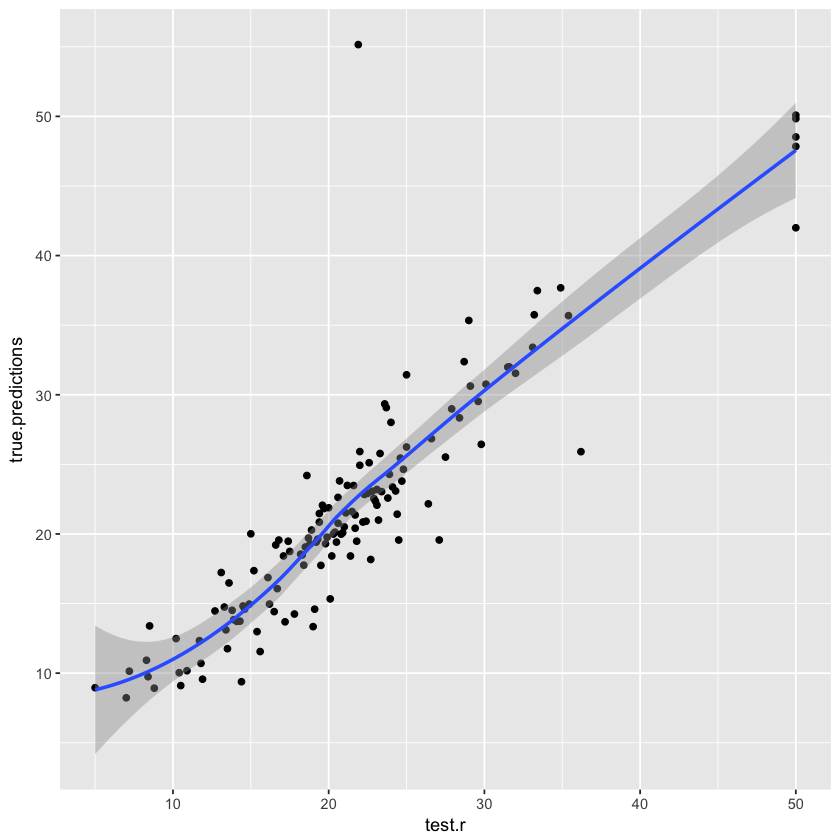

In [31]:
library(ggplot2)
ggplot(error.df,aes(x=test.r,y=true.predictions)) + geom_point() + stat_smooth()

Sieht aus als hätten einige der Häuser unser Modell etwas verzerrt. Insgesamt sieht es aber auch recht gut aus. Erst recht wenn wir bedenken, dass wir es als *Black Box* betrachten.

## Schlussfolgerung

Neuronale Netze ähneln Black Boxen sehr stark: ihr Ergebnis zu erklären ist viel schwerer als das Ergebnis eines einfacheren Modells zu erklären (z.B. lineare Regression). Deshalb solltest du diesen Aspekt bedenken, wenn du ein Modell wählst. Außerdem sollte unser Beispiel gezeigt haben, dass es auf die Kleinigkeiten ankommt und kleine Änderungen das Ergebnis stark beeinflussen können.